In [349]:
import pandas as pd
df= pd.read_csv('C:\\Users\\nEW u\\Desktop\\DataSEts\\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [350]:
df.shape

(7043, 21)

In [351]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [352]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [353]:
df.drop('customerID', axis=1, inplace=True)
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

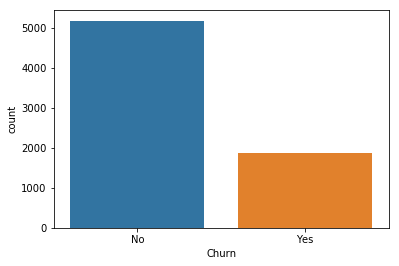

In [354]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

sns.countplot(df['Churn'])

In [355]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [356]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'].dtypes

dtype('float64')

In [357]:
df['TotalCharges'].isnull().sum()

11

In [358]:
df.dropna(axis=0, inplace=True)

In [359]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [360]:
df.shape

(7032, 20)

In [361]:
df_cat=df.select_dtypes(include=['object']).copy()
df_cat.head(3)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [362]:
for i in df_cat.columns:
    print(f'{i} : unique element : {df_cat[i].unique()}')

gender : unique element : ['Female' 'Male']
Partner : unique element : ['Yes' 'No']
Dependents : unique element : ['No' 'Yes']
PhoneService : unique element : ['No' 'Yes']
MultipleLines : unique element : ['No phone service' 'No' 'Yes']
InternetService : unique element : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : unique element : ['No' 'Yes' 'No internet service']
OnlineBackup : unique element : ['Yes' 'No' 'No internet service']
DeviceProtection : unique element : ['No' 'Yes' 'No internet service']
TechSupport : unique element : ['No' 'Yes' 'No internet service']
StreamingTV : unique element : ['No' 'Yes' 'No internet service']
StreamingMovies : unique element : ['No' 'Yes' 'No internet service']
Contract : unique element : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : unique element : ['Yes' 'No']
PaymentMethod : unique element : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : unique element : ['No' 'Yes']


In [363]:
df_cat['MultipleLines']=df_cat['MultipleLines'].replace('No phone service', 'NO')
df_cat['OnlineSecurity']=df_cat['OnlineSecurity'].replace('No internet service', 'NO')
df_cat['OnlineBackup']=df_cat['OnlineBackup'].replace('No internet service', 'NO')
df_cat['DeviceProtection']=df_cat['DeviceProtection'].replace('No internet service', 'NO')
df_cat['TechSupport']=df_cat['TechSupport'].replace('No internet service', 'NO')
df_cat['StreamingTV']=df_cat['StreamingTV'].replace('No internet service', 'NO')
df_cat['StreamingMovies']=df_cat['StreamingMovies'].replace('No internet service', 'NO')



In [364]:
for i in df_cat.columns:
    print(f'{i} : unique element : {df_cat[i].unique()}')

gender : unique element : ['Female' 'Male']
Partner : unique element : ['Yes' 'No']
Dependents : unique element : ['No' 'Yes']
PhoneService : unique element : ['No' 'Yes']
MultipleLines : unique element : ['NO' 'No' 'Yes']
InternetService : unique element : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : unique element : ['No' 'Yes' 'NO']
OnlineBackup : unique element : ['Yes' 'No' 'NO']
DeviceProtection : unique element : ['No' 'Yes' 'NO']
TechSupport : unique element : ['No' 'Yes' 'NO']
StreamingTV : unique element : ['No' 'Yes' 'NO']
StreamingMovies : unique element : ['No' 'Yes' 'NO']
Contract : unique element : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : unique element : ['Yes' 'No']
PaymentMethod : unique element : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : unique element : ['No' 'Yes']


In [365]:
from sklearn.preprocessing import LabelEncoder
scaler_label=LabelEncoder()
df_cat=df_cat.apply(LabelEncoder().fit_transform)

df_cat.head(5)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,0,0,1,2,1,1,1,1,0,1,2,0
1,1,0,0,1,1,0,2,1,2,1,1,1,1,0,3,0
2,1,0,0,1,1,0,2,2,1,1,1,1,0,1,3,1
3,1,0,0,0,0,0,2,1,2,2,1,1,1,0,0,0
4,0,0,0,1,1,1,1,1,1,1,1,1,0,1,2,1


In [366]:
df_num=df.select_dtypes(exclude=['object']).copy()
df_num.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15


C:\Users\nEW u\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


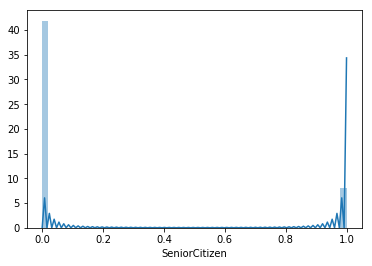

C:\Users\nEW u\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


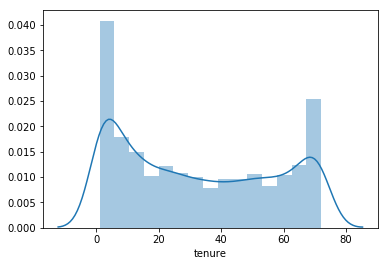

C:\Users\nEW u\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


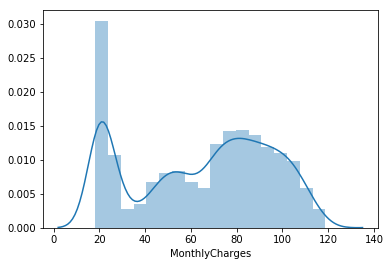

C:\Users\nEW u\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


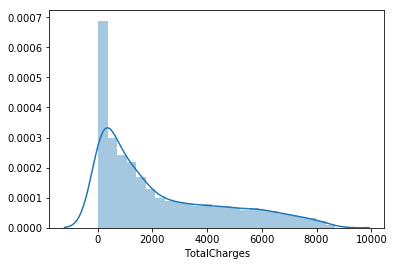

In [367]:
for i in df_num.columns:
    sns.distplot(df_num[i])
    plt.show()

In [368]:
df_num.dtypes

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [369]:
df_num['SeniorCitizen'] = df_num['SeniorCitizen'].astype('float64')

In [370]:
df_num['tenure'] = df_num['tenure'].astype('float64')

In [371]:
df_num.dtypes

SeniorCitizen     float64
tenure            float64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [372]:
df_num.dtypes

SeniorCitizen     float64
tenure            float64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [373]:
from sklearn.preprocessing import MinMaxScaler
df_num_scl=MinMaxScaler()
df_num_scl=df_num_scl.fit_transform(df_num)

In [374]:
df_numeric=pd.DataFrame(data=df_num_scl , columns=df_num.columns)

In [375]:
df_numeric.head(1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,0.0,0.115423,0.001275


In [376]:
df_numeric.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

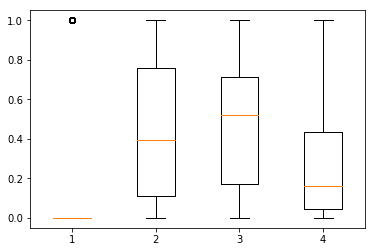

In [377]:
SeniorCitizen=df_numeric['SeniorCitizen']	
tenure=df_numeric['tenure']
MonthlyCharges=df_numeric['MonthlyCharges']
TotalCharges=df_numeric['TotalCharges']

col=[SeniorCitizen, tenure, MonthlyCharges, TotalCharges]
fig, ax = plt.subplots()

ax.boxplot(col)
plt.show()

In [378]:
df_cat.head(1)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,0,0,1,2,1,1,1,1,0,1,2,0


In [379]:
from sklearn.preprocessing import MinMaxScaler
df_cat_scl=MinMaxScaler(feature_range=(0,1))
df_cat_scl=df_cat_scl.fit_transform(df_cat)

df_categorical=pd.DataFrame(data=df_cat_scl , columns=df_cat.columns)
df_categorical.head()


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0.0,1.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,0.5,0.5,0.5,0.0,1.0,0.666667,0.0
1,1.0,0.0,0.0,1.0,0.5,0.0,1.0,0.5,1.0,0.5,0.5,0.5,0.5,0.0,1.000000,0.0
2,1.0,0.0,0.0,1.0,0.5,0.0,1.0,1.0,0.5,0.5,0.5,0.5,0.0,1.0,1.000000,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,0.5,0.5,0.5,0.0,0.000000,0.0
4,0.0,0.0,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0,1.0,0.666667,1.0


In [380]:
df_final=pd.concat([df_categorical, df_numeric], axis=1, join='inner')

In [381]:
df_final.head(3)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,1.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,0.5,0.5,0.5,0.0,1.0,0.666667,0.0,0.0,0.000000,0.115423,0.001275
1,1.0,0.0,0.0,1.0,0.5,0.0,1.0,0.5,1.0,0.5,0.5,0.5,0.5,0.0,1.000000,0.0,0.0,0.464789,0.385075,0.215867
2,1.0,0.0,0.0,1.0,0.5,0.0,1.0,1.0,0.5,0.5,0.5,0.5,0.0,1.0,1.000000,1.0,0.0,0.014085,0.354229,0.010310


In [382]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
gender              7032 non-null float64
Partner             7032 non-null float64
Dependents          7032 non-null float64
PhoneService        7032 non-null float64
MultipleLines       7032 non-null float64
InternetService     7032 non-null float64
OnlineSecurity      7032 non-null float64
OnlineBackup        7032 non-null float64
DeviceProtection    7032 non-null float64
TechSupport         7032 non-null float64
StreamingTV         7032 non-null float64
StreamingMovies     7032 non-null float64
Contract            7032 non-null float64
PaperlessBilling    7032 non-null float64
PaymentMethod       7032 non-null float64
Churn               7032 non-null float64
SeniorCitizen       7032 non-null float64
tenure              7032 non-null float64
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
dtypes: float64(20)
memory usage: 1.1 MB


In [383]:
df_final.corr()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
gender,1.000000,-0.001379,0.010349,-0.007515,-0.010284,-0.002236,-0.013233,-0.011081,-0.003168,-0.008215,-0.007163,-0.009072,0.000095,-0.011902,0.016942,-0.008545,-0.001819,0.005285,-0.013779,0.000048
Partner,-0.001379,1.000000,0.452269,0.018397,0.118037,0.000513,0.092034,0.091536,0.099077,0.077252,0.080205,0.076076,0.294094,-0.013957,-0.156232,-0.149982,0.016957,0.381912,0.097825,0.319072
Dependents,0.010349,0.452269,1.000000,-0.001078,-0.019178,0.044030,-0.028964,-0.061970,-0.068296,-0.040057,-0.085909,-0.099795,0.240556,-0.110131,-0.041989,-0.163128,-0.210550,0.163386,-0.112343,0.064653
PhoneService,-0.007515,0.018397,-0.001078,1.000000,0.674824,0.387266,-0.158997,-0.129432,-0.141055,-0.160950,-0.107242,-0.114798,0.003019,0.016696,-0.005499,0.011691,0.008392,0.007877,0.248033,0.113008
MultipleLines,-0.010284,0.118037,-0.019178,0.674824,1.000000,0.186852,0.069959,0.130978,0.125447,0.069706,0.166256,0.163218,0.084037,0.133538,-0.134147,0.036148,0.113769,0.259112,0.491412,0.412495
InternetService,-0.002236,0.000513,0.044030,0.387266,0.186852,1.000000,-0.719879,-0.650084,-0.645266,-0.716276,-0.592172,-0.596779,0.099579,-0.138166,0.084504,-0.047097,-0.032160,-0.029835,-0.322173,-0.175691
OnlineSecurity,-0.013233,0.092034,-0.028964,-0.158997,0.069959,-0.719879,1.000000,0.704598,0.701112,0.734696,0.661541,0.666682,0.016495,0.184449,-0.168959,0.023014,0.081766,0.232295,0.635260,0.483157
OnlineBackup,-0.011081,0.091536,-0.061970,-0.129432,0.130978,-0.650084,0.704598,1.000000,0.710790,0.708659,0.702605,0.699828,-0.034745,0.260691,-0.180153,0.073934,0.144762,0.253575,0.710175,0.537726
DeviceProtection,-0.003168,0.099077,-0.068296,-0.141055,0.125447,-0.645266,0.701112,0.710790,1.000000,0.724817,0.747489,0.752755,0.006638,0.246011,-0.186777,0.084402,0.140226,0.253834,0.736925,0.546100
TechSupport,-0.008215,0.077252,-0.040057,-0.160950,0.069706,-0.716276,0.734696,0.708659,0.724817,1.000000,0.703306,0.704595,0.048001,0.210547,-0.173402,0.026744,0.067318,0.230429,0.660864,0.495641


In [384]:
df_final.drop(['Churn'], axis=1, inplace=True)

In [385]:
df_final.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen', 'tenure',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [386]:
x=df_final
y=df_cat['Churn']

In [387]:
#features Selection!
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures=SelectKBest(score_func=chi2, k=10)
fit=bestfeatures.fit(x,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
featureScores=pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns=['Specs','Scores']
featureScores.nlargest(n=10,columns='Scores')

,Specs,Scores
12,Contract,555.879527
16,tenure,238.007569
15,SeniorCitizen,133.482766
2,Dependents,131.271509
13,PaperlessBilling,104.979224
1,Partner,81.857769
18,TotalCharges,73.258486
17,MonthlyCharges,50.600233
10,StreamingTV,46.610024
11,StreamingMovies,45.628192


In [388]:
df_new=df_final[['Contract','tenure','SeniorCitizen','Dependents','PaperlessBilling',
                    'Partner','TotalCharges','MonthlyCharges','StreamingTV',                                'StreamingMovies']]

In [389]:
df_new.head(1)

,Contract,tenure,SeniorCitizen,Dependents,PaperlessBilling,Partner,TotalCharges,MonthlyCharges,StreamingTV,StreamingMovies
0,0.0,0.0,0.0,0.0,1.0,1.0,0.001275,0.115423,0.5,0.5


In [390]:
x=df_new
y=df_cat['Churn']

In [391]:
x.shape , y.shape

((7032, 10), (7032,))

In [392]:
y.unique()
y.value_counts()


0    5163
1    1869
Name: Churn, dtype: int64

In [393]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [394]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 10), (1407, 10), (5625,), (1407,))

In [395]:
from sklearn.linear_model import LogisticRegression  
  
classifier = LogisticRegression(C=10,random_state=100,solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=100, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [396]:
classifier.score(X_test,y_test)

0.7853589196872779

In [397]:
from sklearn.model_selection import cross_val_score
lR=cross_val_score(LogisticRegression(),X_train, y_train, cv=5)
import numpy as np
print(lR)
print('\n')
print("The average Score by Using Logistic Regression", np.mean(lR))

[0.79129663 0.784      0.79288889 0.77866667 0.78825623]


The average Score by Using Logistic Regression 0.7870216817071175


In [398]:
#Using Random Forest Classifier!
from sklearn.ensemble import RandomForestClassifier
rF=cross_val_score(RandomForestClassifier(),X_train, y_train, cv=5)
print(rF)
print('\n')
print("The average Score by Using Random Forest Classifier", np.mean(rF))

[0.77708703 0.76444444 0.768      0.77333333 0.77935943]


The average Score by Using Random Forest Classifier 0.7724448484261079


In [399]:
#Using Support Vector Machine!

from sklearn.svm import SVC
s=cross_val_score(SVC(),X_train, y_train, cv=10)
print(s)
print('\n')
print("The average Score by Using Random Forest Classifier", np.mean(s))

[0.78685613 0.80639432 0.78330373 0.78507993 0.82238011 0.76731794
 0.77224199 0.78291815 0.77046263 0.79322638]


The average Score by Using Random Forest Classifier 0.7870181306463098


In [400]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
dT=cross_val_score(DecisionTreeClassifier(),X_train, y_train, cv=5)
print(dT)
print('\n')
print("The average Score by Using Random Forest Classifier", np.mean(dT))

[0.73801066 0.72266667 0.72355556 0.73955556 0.72330961]


The average Score by Using Random Forest Classifier 0.7294196087024617
